In [147]:
import pandas as pd
hr = pd.read_csv('turnover.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("Sample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,0.0,sales,low
1,0.62,0.87,6.0,169.0,2.0,1.0,0.0,0.0,sales,medium
2,0.84,0.99,4.0,262.0,6.0,0.0,1.0,0.0,accounting,medium
3,0.21,0.76,6.0,219.0,4.0,1.0,0.0,0.0,sales,medium
4,0.52,0.38,2.0,103.0,3.0,0.0,0.0,0.0,support,medium


In [148]:
hr=hr.rename(columns = {'sales':'department'})

In [149]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [150]:
hr.isnull().any()

satisfaction_level       True
last_evaluation          True
number_project           True
average_montly_hours     True
time_spend_company       True
Work_accident            True
left                     True
promotion_last_5years    True
department               True
salary                   True
dtype: bool

In [151]:
hr.shape

(14999, 10)

In [152]:
hr['department'].unique()
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [153]:
hr['left'].value_counts()

0.0    11427
1.0     3571
Name: left, dtype: int64

In [154]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0.0,0.667363,0.715448,3.786715,199.066439,3.380098,0.175070,0.026256
1.0,0.440152,0.718055,3.855503,207.419210,3.876505,0.047326,0.005321


In [155]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.618106,0.712036,3.853875,200.800508,3.367684,0.170267,0.153748,0.034307
accounting,0.583786,0.717974,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.600565,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.620494,0.723927,3.861685,201.249206,4.303175,0.163752,0.144444,0.109524
marketing,0.616611,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.623333,0.714500,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.615435,0.709654,3.776329,200.918579,3.534058,0.141822,0.244987,0.024155
technical,0.614188,0.720996,3.839352,201.833468,3.416194,0.144153,0.246802,0.008260


In [156]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637235,0.704121,3.767799,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.601375,0.717076,3.800137,201.012854,3.438337,0.142174,0.296787,0.009024
medium,0.622529,0.717247,3.813528,201.343057,3.529010,0.145429,0.204344,0.028079


# 数据可视化：

# 工作与离职率的条形图

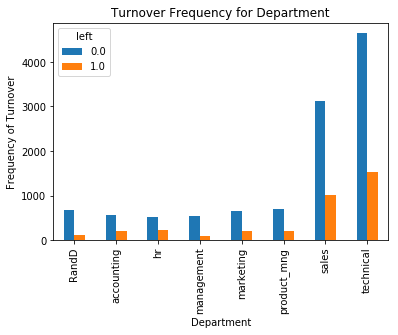

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

# 薪资与离职率的条形图

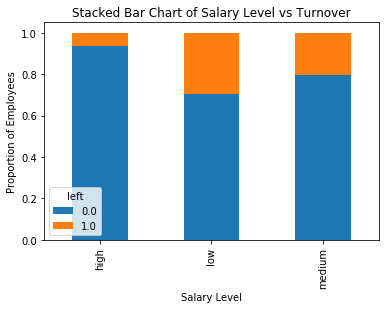

In [158]:
table = pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked = True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

# 变量直方图

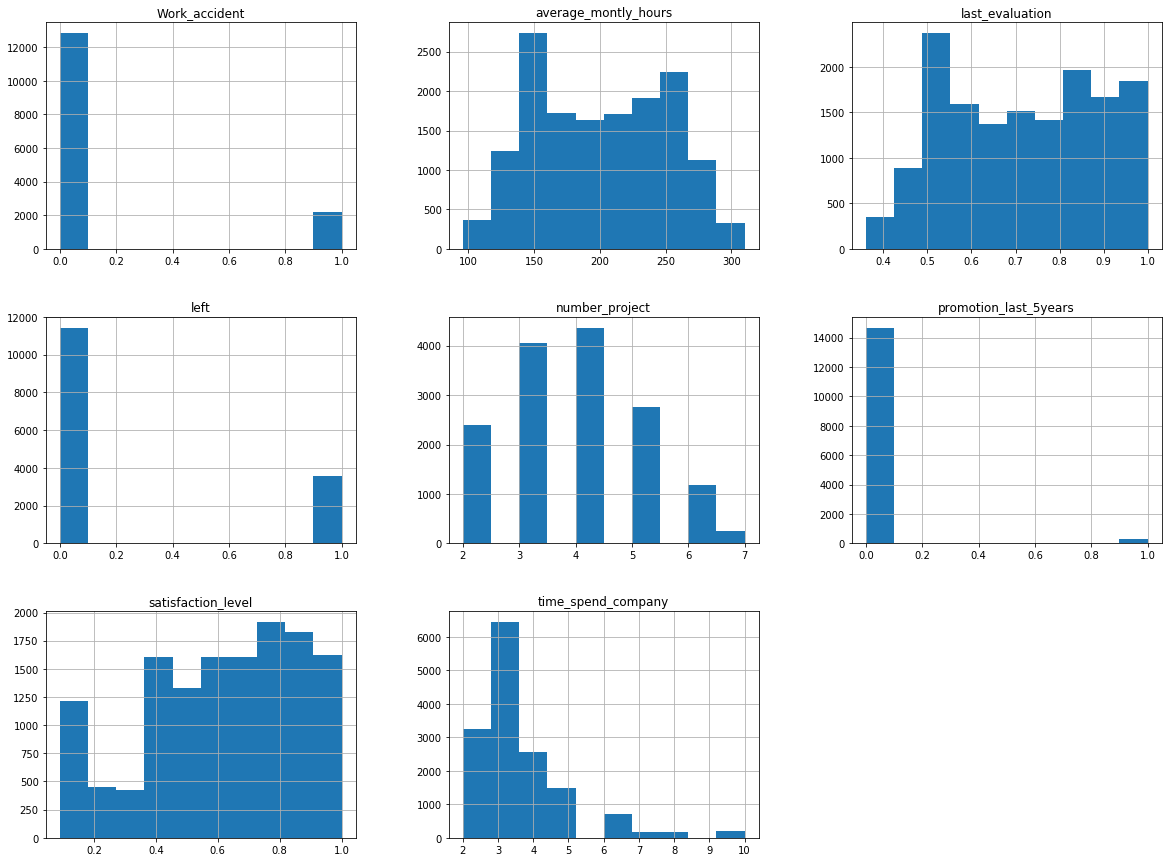

In [159]:
num_bins = 10
hr.hist(bins= num_bins,figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()